# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?


1. The data set I chose was the AirBNB data set.
2. I will be predicting is an AirBnB would be high rated based on multiple review scores. The label will be called high_rating. Within the column, it will be in binary units, in which it will have 1 if the average review score is 4.7 or higher and 0 if otherwise.
3. This is a supervised learning problem because we are predicting a label we know. This is a classification problem because the output will either be 1 for highly-rated or 0 for low-rated.
4. The features utilized will be host_response_rate, host_acceptance_rate, host_is_superhost, host_listings_count, instant_bookable, reviews_per_month, n_host_verifications, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, and calculated_host_listings_shared_rooms.
5. This is an important problem because the AirBnB company can use it to figure out what characteristics homes/rooms that are highly-rated have. This can help them figure out how they can satisfy their customers, and they can advertise other listings that have similar features from what they've learned from highly-rated listings. This can help them maintain user retention.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

Data Types:
name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                            

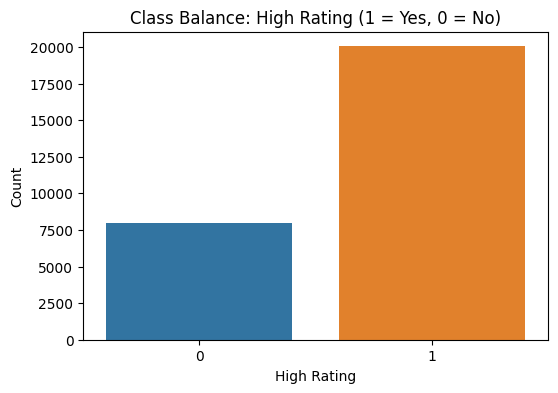

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [3]:
# Get insight on statstics and data types.
print("Data Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())

# If I want to look for missing values.
print("\nMissing Values:")
print(df.isnull().sum())

# See if data is imbalanced based on high or lowly rated.
df['high_rating'] = (df[['review_scores_communication', 'review_scores_location', 'review_scores_value']].mean(1) >= 4.7).astype(int)
print(df['high_rating'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='high_rating', data=df)
plt.title("Class Balance: High Rating (1 = Yes, 0 = No)")
plt.xlabel("High Rating")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(10,6))

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

As for my new feature list, after looking at the data from the previous, I wanted to keep the features taht had the most relation to the experience of the Airbnb guests. These would be review_scores_communication, review_scores value_ and review_scores_location. With high_rating, a new column I created, listings will be able to be labeled as highly rated if their average review score is 4.7 or above. Since I am focused on the customer experience, if columns are unrelated or if they have a lot of missing values like host_about and description, I plan on not including them.

The different data preparation techniques that I will use to prepare my data for modeling include normalizing the numerical columns, not including irrelevant columns, filling in missing numbers with the mean of each column, and also looking for imbalances.

My model is going to be a model using logistic regression since it is typically useful for binary classification problems. To improve performance, I can look into decision trees.

My plan to train my model is to first, split the data. This split will be between training and test sets. Then, the model will be trained using the training set with criteria set on recall, accuracy, and also precision for analysis. If it does not perform well, I will have to try a different model. Another alternative is to also change the hyperparameters and utilize cross-validation on the results. After I evaluate the model, I will look into where mistakes and being made and validate that the predictions are right and align with the data. I would adjust the features that I use and try to feature select. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [53]:
# These will be the features I will utilize based on my model problem set.
features = ['calculated_host_listings_count_shared_rooms', 'reviews_per_month','n_host_verifications']

# Chose the first feature because of how spread out the host is in terms of their operation. Second because it can signify how popular the listing is. The third shows that verifications can show trustworthiness.
X = df[features] #represents feature
y = df['high_rating'] # the target

print("Class distribution:")
print(y.value_counts()) 

# To resample, we combine them.
df_combined = pd.concat([X, y], axis=1)

# Majority because of what we saw in values pre-balance
majority = df_combined[df_combined['high_rating'] == 1] # we have a lot more 1s than 0s.
minority = df_combined[df_combined['high_rating'] == 0]

# We have to upsample so that both Class1 and Class 0 are balanced.
minority_upsampled = resample(minority, replace = True, n_samples = len(majority), random_state=42)
df_balanced = pd.concat([majority, minority_upsampled])

print("\nClass distribution after we balance:")
print(df_balanced['high_rating'].value_counts())

X_bal = df_balanced[features]
y_bal = df_balanced['high_rating']

# Training set will be 80% and Test set is 20% (0.2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Class distribution:
1    20042
0     7980
Name: high_rating, dtype: int64

Class distribution after we balance:
1    20042
0    20042
Name: high_rating, dtype: int64


In [63]:
# Utilizing Logistic Regression model, as it is useful for binary classification problems.
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test data
# y_pred gives the predicted class labels, where are 0 or 1.
# y_prob gives predicted probabilities of class 1 
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [64]:
# Creating accuracy and classification
acc = accuracy_score(y_test, y_pred) # This tells us the percentage of teh correc predictions.
print(f"Accuracy: {acc:.4f}")
print("\nClassification\n", classification_report(y_test, y_pred)) # Gives us more detail on those predictions through precision, recall and F1.


Accuracy: 0.5267

Classification
               precision    recall  f1-score   support

           0       0.32      0.57      0.41      1596
           1       0.75      0.51      0.61      4009

    accuracy                           0.53      5605
   macro avg       0.53      0.54      0.51      5605
weighted avg       0.62      0.53      0.55      5605



I trained the model and found its performance through an accuracy and classifcation report where there was an accuracy of 71.53%. This means approximately 7/10 of the predictions were correct. For high-rated listings, since recall was 1.00, thsi means they correctly found all the high-rated listing and it has a good F1 score which shows balance between precision. With the 0 class, with a recall of 0, this means that there was bias in prediction.

NOW, after balancing, we can see signficant change in recall. The accuracy dropped but now it is more fair between class 1 and class 0. This trade-off is better because when going through data, all classes (data) should not be ignored.

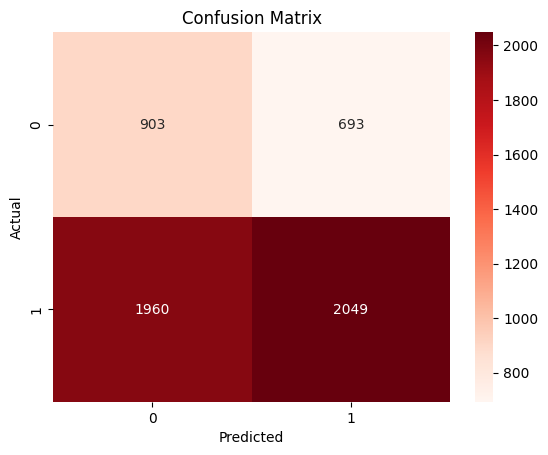

In [65]:
# Create a confusion matrix so we see how well the model is classifying each class.
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
# Created cmap value for ease of reading chart
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


PRE-BALANCE: We can see taht only 4 listings were predicted correctly to be low-rated. There was a LOT of listings, 1,592, that were incorrecly predicted in class 1. The model is correcly predicting high-rated listings while severely misclassifying class 0.

POST-BALANCE: The model is now looking at both classes rather than biasing class 1. However, there are a lot of high-rated listings that are missed. Compared to before, this matrix shows more fairness between both classes.

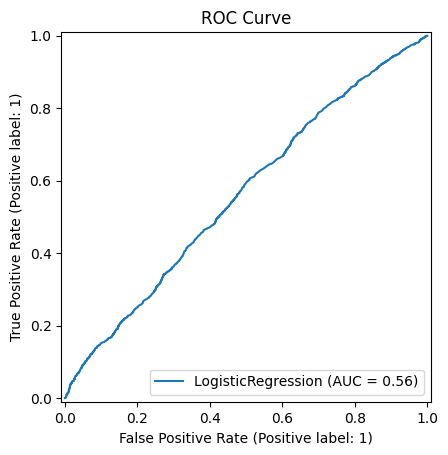

InvalidParameterError: The 'y_score' parameter of roc_auc_score must be an array-like. Got 0.4639923998096176 instead.

In [66]:
# Create ROC Curve graph and shows the relationship between TPR and FPR. 
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

print(f"AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
